#Lung Cancer Classification

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

## Import Dataset

In [2]:
from google.colab import files
datasets = files.upload()

Saving lung-cancer.csv to lung-cancer.csv


In [ ]:
# load dataset
#from google.colab import drive

#drive.mount('/drive')
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/LungCancerDataset.csv')
#data.head()

In [2]:
data = pd.read_csv('lung-cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**Columns Description:**

Gender: Male or Fale

1. Age: Usia
2. Smoking
3. Yellow Finger
4. Anxiety
5. Peer Presure
6. Chronic Disease
7. Fatigue
8. Allergy
9. Wheezing
10. Alchohol Consuming
11. Coughing
12. Shortness of Breath
13. Swallowing Difficulty
14. Chest Pain
15. Lung Cancer (Target)

note:<br>
**1 - No || 2 - Yes**

## Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

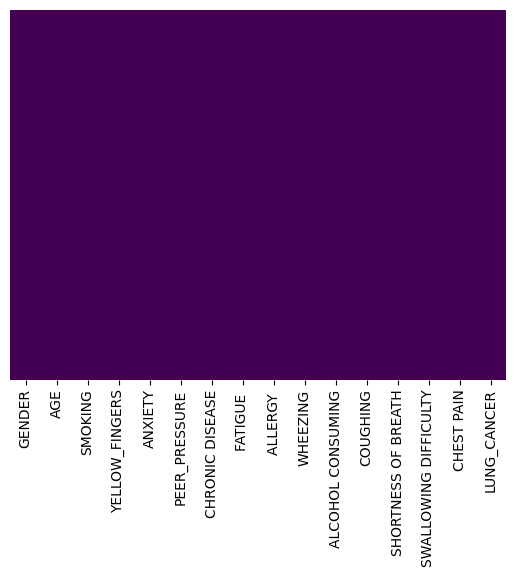

In [5]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

**Data Outline**

In [6]:
lung_test = data['LUNG_CANCER'].value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[0]
lung_n = lung_test[1]

print("Count of 'Yes':", lung_y)
print("Count of 'No':", lung_n)

Count of 'Yes': 270
Count of 'No': 39


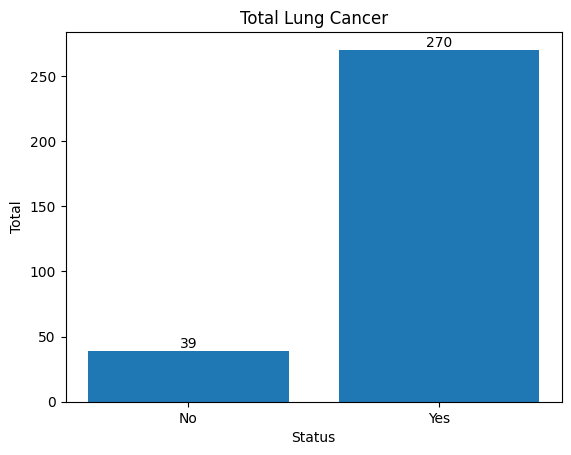

In [8]:
# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

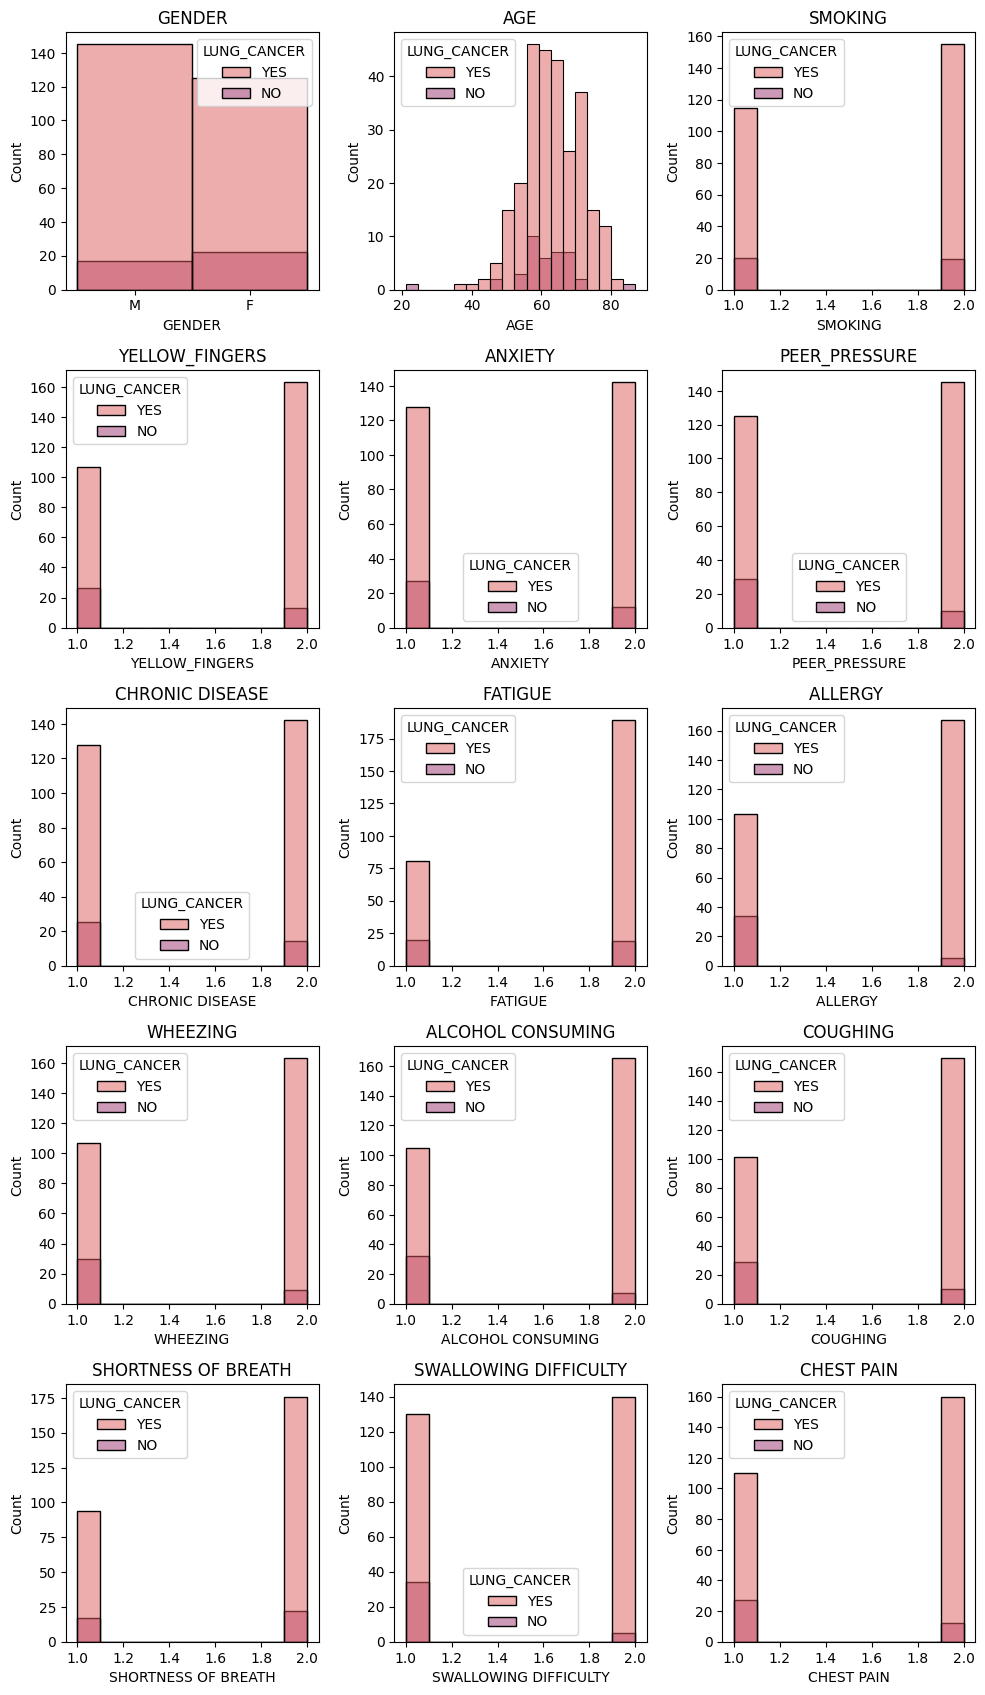

In [9]:
list_column = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig = plt.figure(figsize=(10,20))

for i in range(len(list_column)): #15
    plt.subplot(6, 3, i+1)
    plt.title(list_column[i])
    sns.histplot(data = data, x = data[list_column[i]], hue='LUNG_CANCER', palette='flare')

plt.tight_layout()

<ipython-input-10-04993d574cc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');


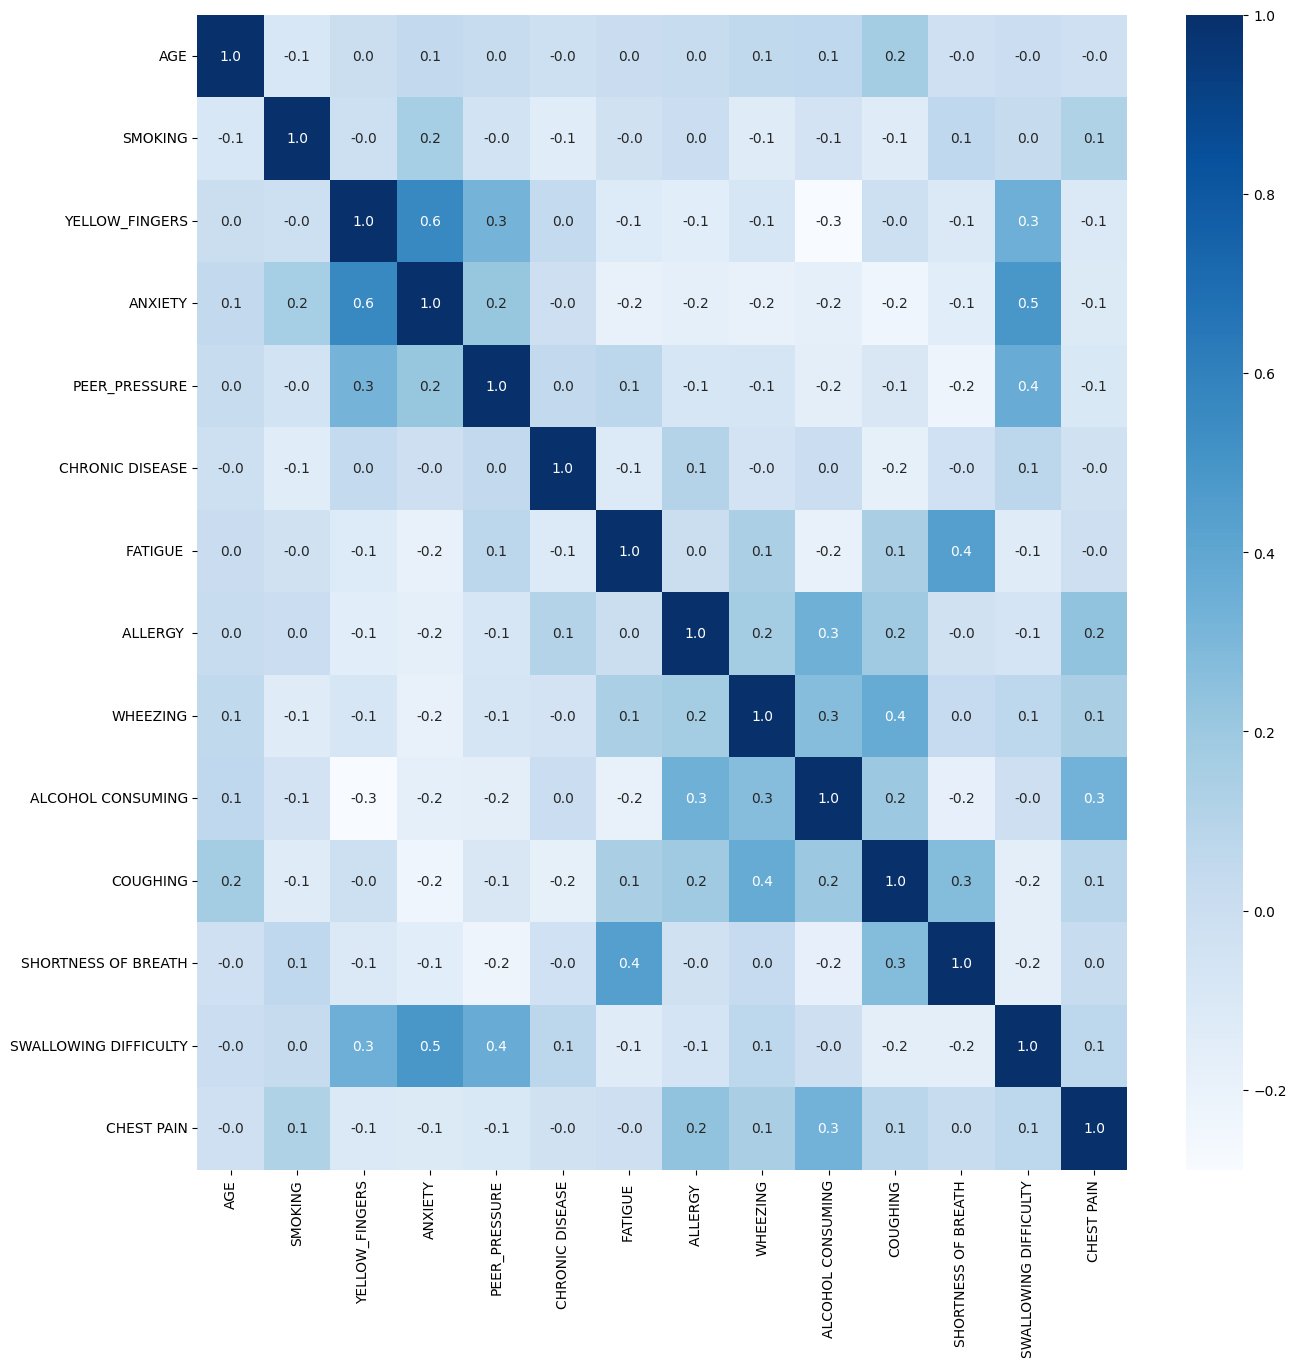

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');

Correlation among features are:

- 'ANXIETY' and 'SWALLOWING DIFFICULTY' : 0.5
- 'FATIGUE ' and 'SHORTNESS OF BREATH' : 0.4
- 'GENDER' and 'CHEST PAIN' : -0.4
- 'GENDER' and 'ALCOHOL CONSUMING' : -0.5


Correlation with 'LUNG CANCER' are:
- 'ALLERGY ', 'ALCOHOL CONSUMING' and 'SWALLOWING DIFFICULTY' : 0.3
- 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'WHEEZING', 'COUGHING' and 'CHEST PAIN' : 0.2


And also, our feature or columns have **positive correlation**. Characterized by the same positive value (1.0) diagonally

**Label Encoding**

In [11]:
data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['NO', 'YES'], [0, 1], inplace=True)

data.drop_duplicates(inplace=True)
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,0,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,0,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [12]:
data = data.drop(['SMOKING', 'SHORTNESS OF BREATH'], axis=1)

data.drop_duplicates(inplace=True)
data

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,2,2,1,1,2,1,2,2,2,2,2,1
1,0,74,1,1,1,2,2,2,1,1,1,2,2,1
2,1,59,1,1,2,1,2,1,2,1,2,1,2,0
3,0,63,2,2,1,1,1,1,1,2,1,2,2,0
4,1,63,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,2,2,2,1,1,2,2,1,2,2,1,1
280,1,59,1,1,1,2,2,2,1,1,1,1,1,0
281,0,55,1,1,1,1,2,2,1,1,1,1,2,0
282,0,46,2,2,1,1,1,1,1,1,1,2,2,0


**Handling Outlier**

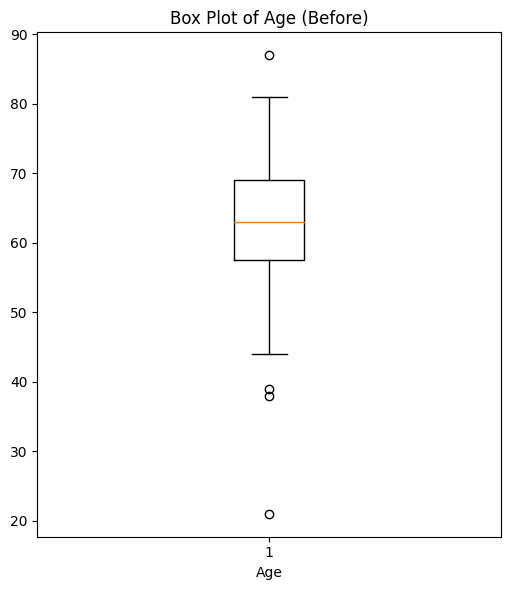

In [13]:
# Box plot before removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['AGE'])
plt.title('Box Plot of Age (Before)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [14]:
q = data["AGE"].quantile(0.99)
data[data["AGE"] < q]
q_low = data["AGE"].quantile(0.01)
q_hi  = data["AGE"].quantile(0.99)

filtered_data = data[(data["AGE"] < q_hi) & (data["AGE"] > q_low)]

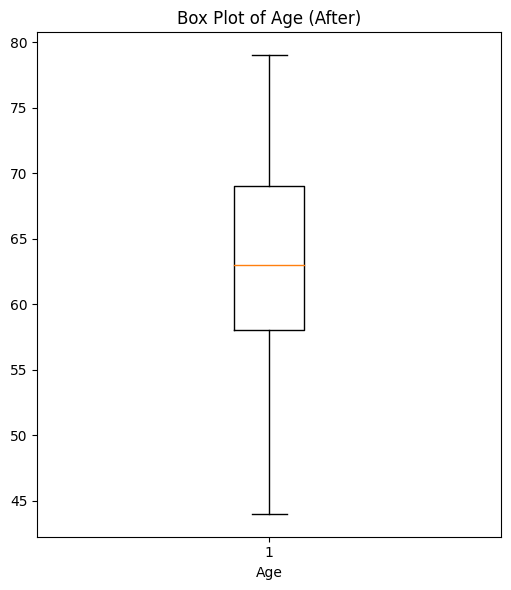

In [15]:
import matplotlib.pyplot as plt

# Box plot after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_data['AGE'])
plt.title('Box Plot of Age (After)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [16]:
#y = data['LUNG_CANCER']
#X = data.drop('LUNG_CANCER',axis=1)

y = filtered_data['LUNG_CANCER']
X = filtered_data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,1,0,0,1,0,1,1,1,1,1
1,0,74,0,0,0,1,1,1,0,0,0,1,1
2,1,59,0,0,1,0,1,0,1,0,1,0,1
3,0,63,1,1,0,0,0,0,0,1,0,1,1
4,1,63,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,1,1,0,0,1,1,0,1,1,0
280,1,59,0,0,0,1,1,1,0,0,0,0,0
281,0,55,0,0,0,0,1,1,0,0,0,0,1
282,0,46,1,1,0,0,0,0,0,0,0,1,1


## Modeling

We will try to divide the data to ***train-test-validation***.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [90]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [91]:
X.shape

(269, 13)

In [92]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.transform(X_val[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])

print(scaler.mean_)
print(scaler.var_)

[63.01428571]
[43.49979592]


In [111]:
del model

In [112]:
from tensorflow.keras import initializers
#initializer = tf.keras.initializers.HeNormal(seed=0)

from tensorflow.keras import initializers

model = Sequential(
    [
        Dense(3, activation = 'relu', input_shape=[13]),
        #Dense(3, activation = 'relu'),
        Dense(1, activation = 'sigmoid'),
    ]
)

In [113]:
model.build()

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 42        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=100, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.6884 - accuracy: 0.5071 - val_loss: 0.7031 - val_accuracy: 0.4630
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5464 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5786 - val_loss: 0.6988 - val_accuracy: 0.5370
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.6143 - val_loss: 0.6943 - val_accuracy: 0.5741
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6357 - val_loss: 0.6904 - val_accuracy: 0.6111
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.6536 - val_loss: 0.6849 - val_accuracy: 0.6852
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.6893 - val_loss: 0.6779 - val_accuracy: 0.7222
Epoch 8/100


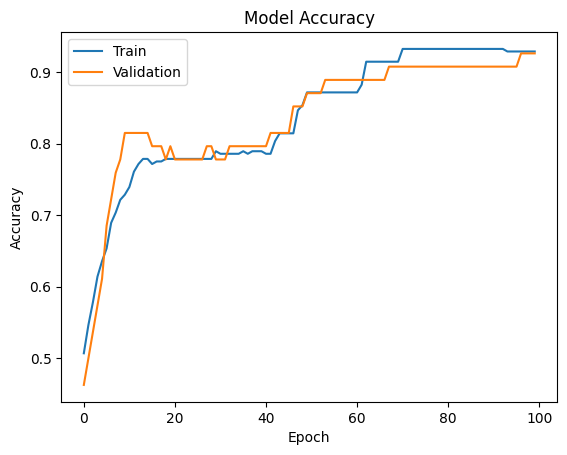

In [116]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

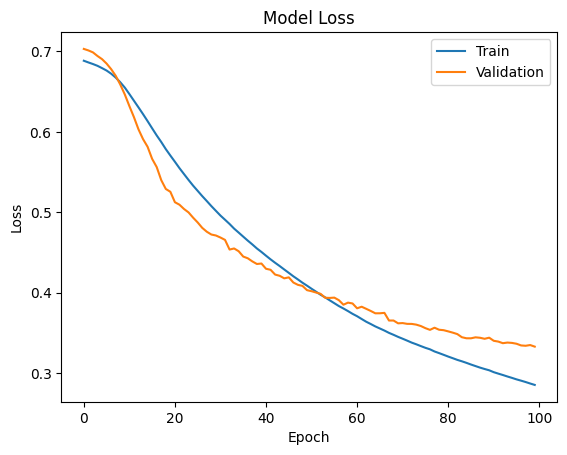

In [117]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [118]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.2867 - accuracy: 0.9259
Test loss: 0.28671830892562866
Test accuracy: 0.9259259104728699


2/2 [==============================] - 0s 8ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

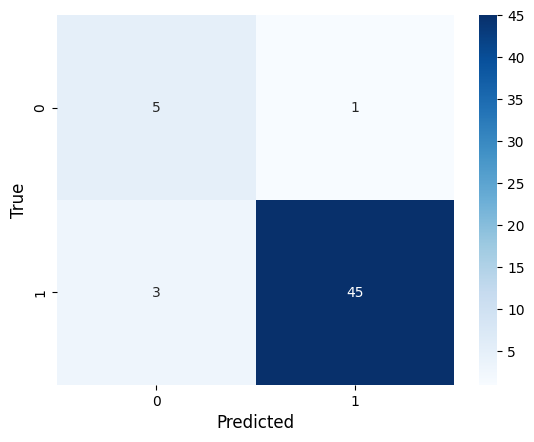

In [119]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [120]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.98      0.94      0.96        48

    accuracy                           0.93        54
   macro avg       0.80      0.89      0.84        54
weighted avg       0.94      0.93      0.93        54



In [121]:
print(model.trainable_variables)

[<tf.Variable 'dense_16/kernel:0' shape=(13, 3) dtype=float32, numpy=
array([[ 0.15847827,  0.8075657 ,  1.2396451 ],
       [-0.12073558,  0.2640777 ,  0.12225047],
       [ 0.1869926 ,  1.1636167 , -0.33664495],
       [-0.8064028 , -0.27886307, -1.2278185 ],
       [ 0.03447273,  0.22488834, -0.18390064],
       [-0.2691678 ,  0.05006612,  0.10607322],
       [ 0.04300369,  0.6657501 , -0.28486162],
       [-0.4406092 ,  1.4133728 , -1.5835888 ],
       [-0.11493894,  0.51973283,  0.8007098 ],
       [-1.2414948 ,  0.6414347 , -1.1689675 ],
       [ 0.2694839 ,  1.0638824 ,  0.3760615 ],
       [-0.6033752 ,  0.34695926, -0.7113519 ],
       [ 0.6020474 ,  0.22415106, -0.19560386]], dtype=float32)>, <tf.Variable 'dense_16/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.82655704, -0.8298495 ,  0.6405953 ], dtype=float32)>, <tf.Variable 'dense_17/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.84521294],
       [ 0.90197283],
       [-1.0119163 ]], dtype=float32)>, <tf.Varia

## Save Model

In [122]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [126]:
model.save('lung_model.h5')

In [124]:
from google.colab import files

files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
files.download('lung_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
new_model = tf.keras.models.load_model('lung_model.h5')

In [129]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 10ms/step - loss: 0.2867 - accuracy: 0.9259
Restored model, accuracy: 92.59%


## Test Model

In [130]:
#Manual Scale
mean = 63.014 #[63.01428571]
vari = 43.499 #[43.49979592]
input_x = 57
scale_final = (input_x - mean) / vari

print(scale_final)

-0.1382560518632613


In [131]:
X_new = [[0,-0.138256,1,0,0,0,1,0,1,1,1,1,1]]
new_model.predict(X_new)

# 1 - POSITIVE
# 0 - NEGATIVE

1/1 [==============================] - 0s 93ms/step


array([[0.93726057]], dtype=float32)

In [132]:
type(X_test)

pandas.core.frame.DataFrame

In [133]:
prediction = new_model.predict(X_test)
data_ans = pd.DataFrame({'LUNG CANCER' :y_test})
data_ans['Prediction'] = np.round_(prediction)

2/2 [==============================] - 0s 6ms/step


In [134]:
data_ans

,LUNG CANCER,Prediction
31,1,1.0
123,1,1.0
80,0,0.0
134,1,1.0
197,1,1.0
144,1,1.0
210,1,1.0
46,1,1.0
180,1,1.0
250,1,1.0


In [135]:
X_test.iloc[1]

GENDER                   1.000000
AGE                      0.452694
YELLOW_FINGERS           1.000000
ANXIETY                  1.000000
PEER_PRESSURE            0.000000
CHRONIC DISEASE          1.000000
FATIGUE                  1.000000
ALLERGY                  1.000000
WHEEZING                 1.000000
ALCOHOL CONSUMING        1.000000
COUGHING                 1.000000
SWALLOWING DIFFICULTY    0.000000
CHEST PAIN               0.000000
Name: 123, dtype: float64